# Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import torch
import torchvision.transforms as transforms

# Add the parent directory to the Python path - bad practice, but it's just for the example
import sys
if ".." not in sys.path:
    sys.path.append("..")

from src.glocal_analysis import run_analysis 
from src.plot_crp_explanations import plot_explanations
from src.datasets.person_car_dataset import PersonCarDataset
from LCRP.models import get_model 

ADDING vgg
ADDING mobilenet_v2
ADDING efficient_net-b3
ADDING mobilenet_v3
ADDING SSDBoxPredictor
ADDING SSDLiteBoxPredictor
ADDING SSDBoxHead


In [3]:
# device = "mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"

# Loading dataset and model

In [45]:
dtype = torch.float32
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to tensor
    transforms.Resize((1280, 1280)),
    transforms.Lambda(lambda x: x.to(dtype)), 
])


# Load dataset
root_dir = "../datasets/data/person_car_detection_data/Arthal/"
dataset = PersonCarDataset(root_dir=root_dir, split="train", transform=transform)

model_name = "yolov6s6"
ckpt_path = "../models/best_v6s6_ckpt.pt"

# Loading unet with path to checkpoint
model = get_model(model_name=model_name, classes=2, ckpt_path=ckpt_path, device=device, dtype=dtype)

# Running analysis and plotting results

In [5]:
# This folder contains results of the glocal analysis.

output_dir = "output/crp/yolo_person_car"

In [32]:
# Only run this if needed, takes a long time (79 on cpu on my laptop).
# run_analysis(model_name, model, dataset, output_dir="output/crp/yolo_person_car")

torch.Size([9, 8])
torch.Size([9, 8])
Predicted classes:  [1]
Concepts: torch.return_types.topk(
values=tensor([0.0239, 0.0147, 0.0145]),
indices=tensor([185, 418, 499]))


/Users/kortukov/git/l-crp-tema/examples/../plot_crp_explanations.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  boxes = torch.tensor(predicted_boxes, dtype=torch.float)[None]


torch.Size([9, 8])
Computing reference images...
torch.Size([43, 8])
torch.Size([43, 8])
torch.Size([28, 8])
torch.Size([13, 8])
torch.Size([8, 8])
torch.Size([12, 8])
torch.Size([37, 8])
torch.Size([6, 8])
torch.Size([2, 8])
Plotting...



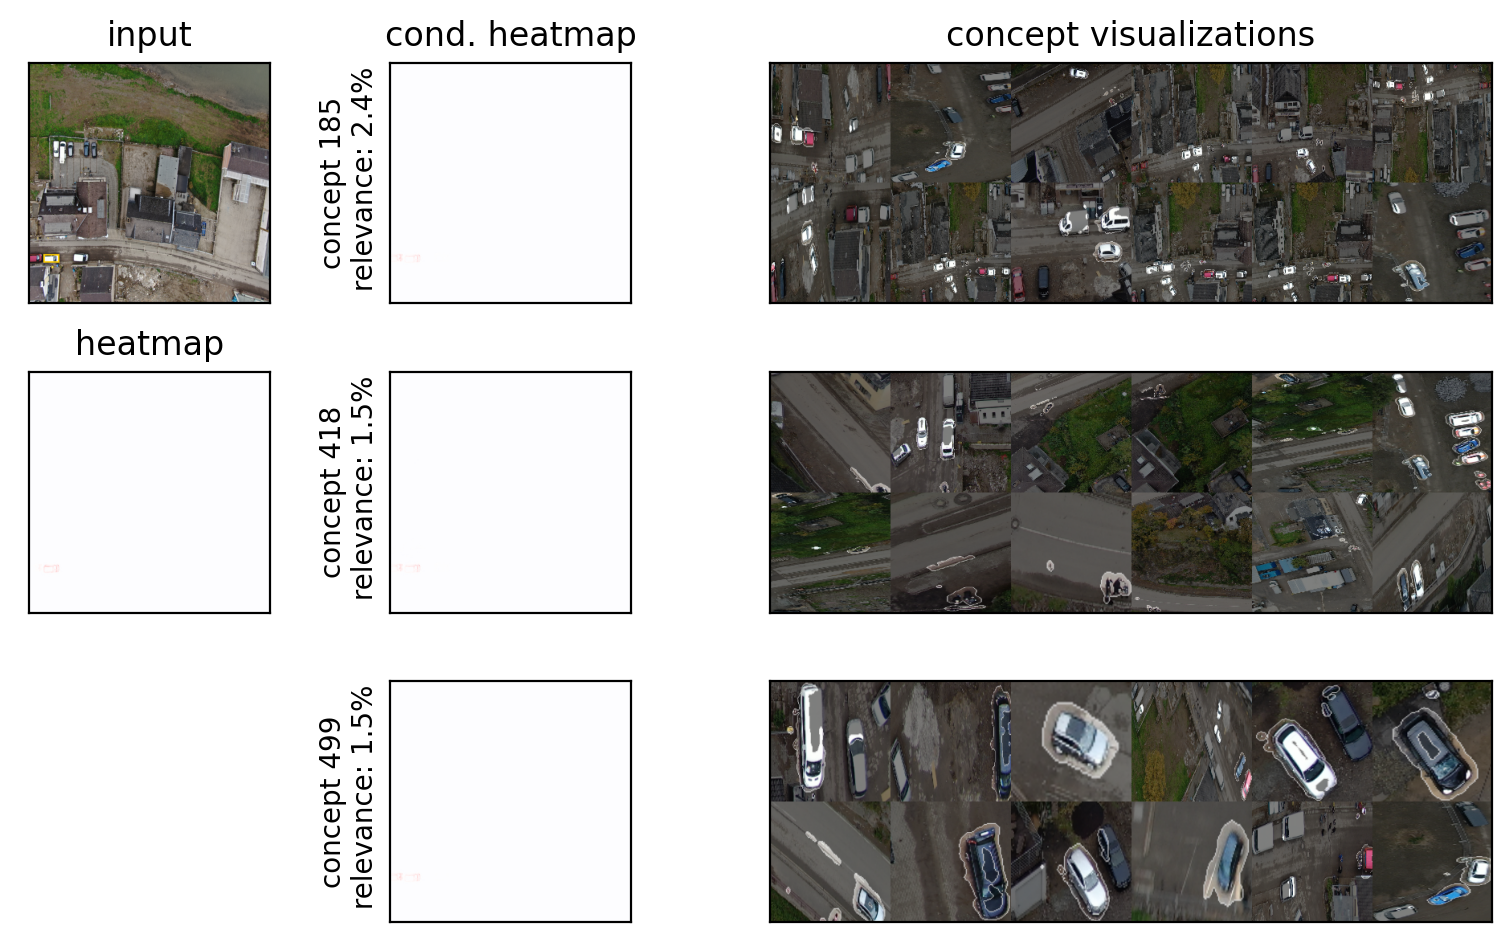

Done plotting.


In [46]:
# Setting up main parameters
class_id = 1
sample_id = 11
n_concepts = 3
n_refimgs = 12
layer = "module.backbone.ERBlock_6.2.cspsppf.cv7.block.conv"
mode = "relevance"
prediction_num = 0

# if failing, try to restart the notebook and do not run analysis again, go directly to plotting
plot_explanations(model_name, model, dataset, sample_id, class_id, layer, prediction_num, mode, n_concepts, n_refimgs, output_dir=output_dir)